<a href="https://colab.research.google.com/github/EmilyCarroll-del/Michael-J-Fox-Foundation-FOG-in-PD/blob/main/MJFF_FOG_Prediction_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gsutil cp -r gs://fog-data/data/training/tdcsfog .

You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
%ls

/content/drive/MyDrive/Colab Notebooks
MJFF-FOG-Prediction-PD.ipynb                tlvmc-parkinsons-freezing-gait-prediction.zip
tlvmc-parkinsons-freezing-gait-prediction/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
import zipfile

# Path to the zip file
zip_path = '/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction.zip'
# Directory to extract the files
extract_dir = '/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/'

# Create the extraction directory
os.makedirs(extract_dir, exist_ok=True)

In [ ]:
fog_path = extract_dir

# List files in the directory
file_names = os.listdir(fog_path)
print(file_names)

#create a directory to the training data folder
train_dir = os.path.join(fog_path, 'train')
print(os.listdir(train_dir))

#directory to each folder in train
train_defog_dir = os.path.join(train_dir, 'defog')
train_tdcsfog_dir = os.path.join(train_dir, 'tdcsfog')
train_notype_dir = os.path.join(train_dir, 'notype')

['daily_metadata.csv', 'defog_metadata.csv', 'events.csv', 'sample_submission.csv', 'subjects.csv', 'tasks.csv', 'tdcsfog_metadata.csv', 'test', 'train', 'unlabeled']
['defog', 'notype', 'tdcsfog']


In [ ]:
#DO NOT RUN THIS BLOCK TWICE
import zipfile

# Path to the zip file
zip_path = '/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction.zip'
# Directory to extract the files
extract_dir = '/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/'

# Create the extraction directory
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:

def process_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)

        # Check if the file is a CSV and process it
        if file_name.endswith('.csv') and os.path.isfile(file_path):
            df = pd.read_csv(file_path) #read csv files
            df['source_directory'] = os.path.basename(directory)  # Add a column to identify the source directory
            df['csv_name'] = os.path.basename(file_name)
            dfs.append(df)

        return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# Process each subdirectory
defog = process_directory(train_defog_dir)
tdcsfog = process_directory(train_tdcsfog_dir)
notype = process_directory(train_notype_dir)

#train_df = pd.concat(train_data, ignore_index=True)
print("Data concatenation complete.")

Data concatenation complete.


In [ ]:
#already extracted files
defog = process_directory('/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/defog')
tdcsfog = process_directory('/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog')
notype = process_directory('/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/notype')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/defog'

In [ ]:
defog.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,source_directory,csv_name
0,0,-1.0,0.044129,-0.25,0,0,0,False,False,defog,02ea782681.csv
1,1,-1.0,0.034431,-0.25,0,0,0,False,False,defog,02ea782681.csv
2,2,-1.0,0.031250,-0.25,0,0,0,False,False,defog,02ea782681.csv
3,3,-1.0,0.031250,-0.25,0,0,0,False,False,defog,02ea782681.csv
4,4,-1.0,0.031250,-0.25,0,0,0,False,False,defog,02ea782681.csv


In [ ]:
tdcsfog.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,source_directory,csv_name
0,0,-9.533939,0.566322,-1.413525,0,0,0,tdcsfog,003f117e14.csv
1,1,-9.536140,0.564137,-1.440621,0,0,0,tdcsfog,003f117e14.csv
2,2,-9.529345,0.561765,-1.429332,0,0,0,tdcsfog,003f117e14.csv
3,3,-9.531239,0.564227,-1.415490,0,0,0,tdcsfog,003f117e14.csv
4,4,-9.540825,0.561854,-1.429471,0,0,0,tdcsfog,003f117e14.csv


In [ ]:
notype.head()

,Time,AccV,AccML,AccAP,Event,Valid,Task,source_directory,csv_name
0,0,-0.914652,-0.300851,0.298156,0,False,False,notype,02ab235146.csv
1,1,-0.914367,-0.301572,0.298325,0,False,False,notype,02ab235146.csv
2,2,-0.779540,-0.343197,0.275690,0,False,False,notype,02ab235146.csv
3,3,-0.993162,-0.270281,0.315775,0,False,False,notype,02ab235146.csv
4,4,-0.948767,-0.307849,0.297191,0,False,False,notype,02ab235146.csv


In [ ]:
print(defog.shape)

defog['IsFOG'] = defog[['StartHesitation', 'Walking', 'Turn']].any(axis='columns')
mask = defog['IsFOG'] != 0
FOG_count = mask.sum()
print(FOG_count)


(162907, 11)
129


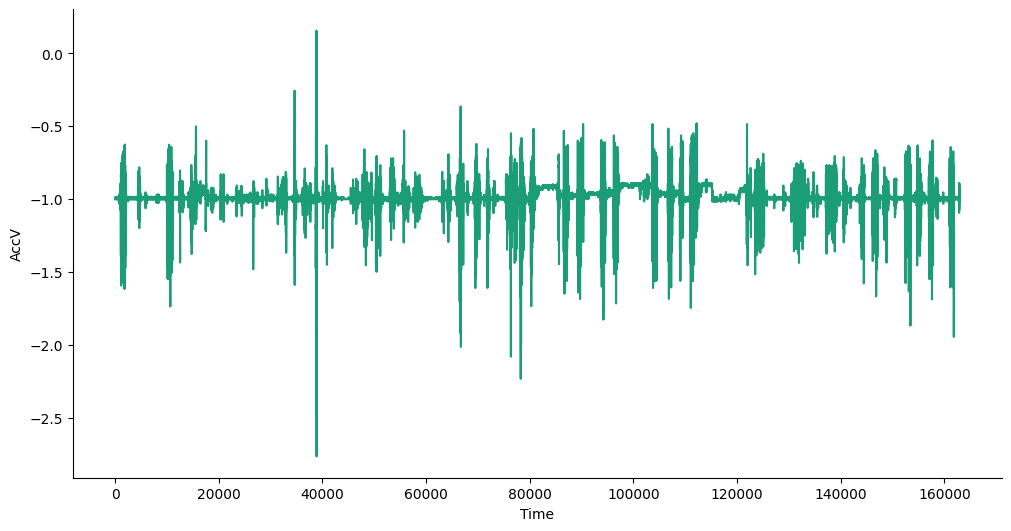

In [ ]:
# @title Time vs AccV

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['AccV']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = defog.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('AccV')

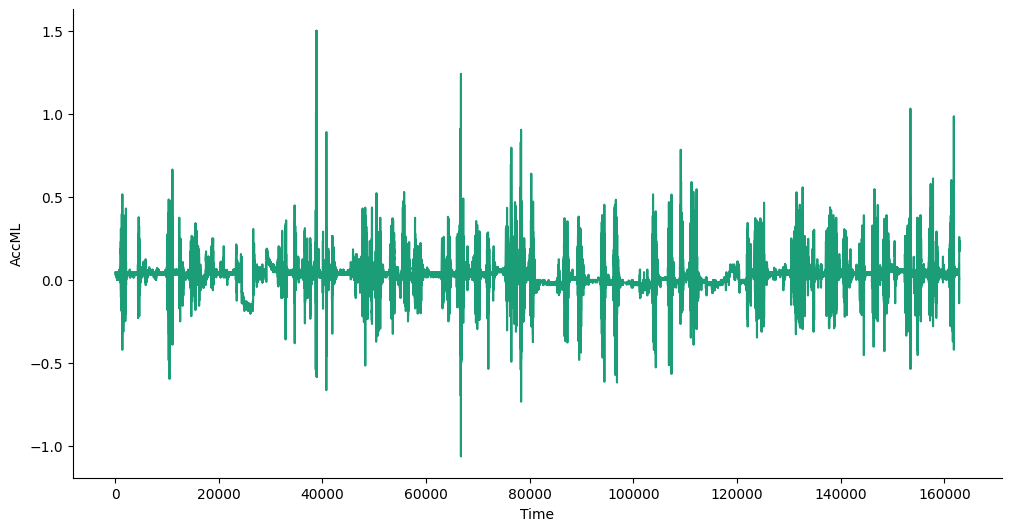

In [ ]:
# @title Time vs AccML

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['AccML']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = defog.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('AccML')

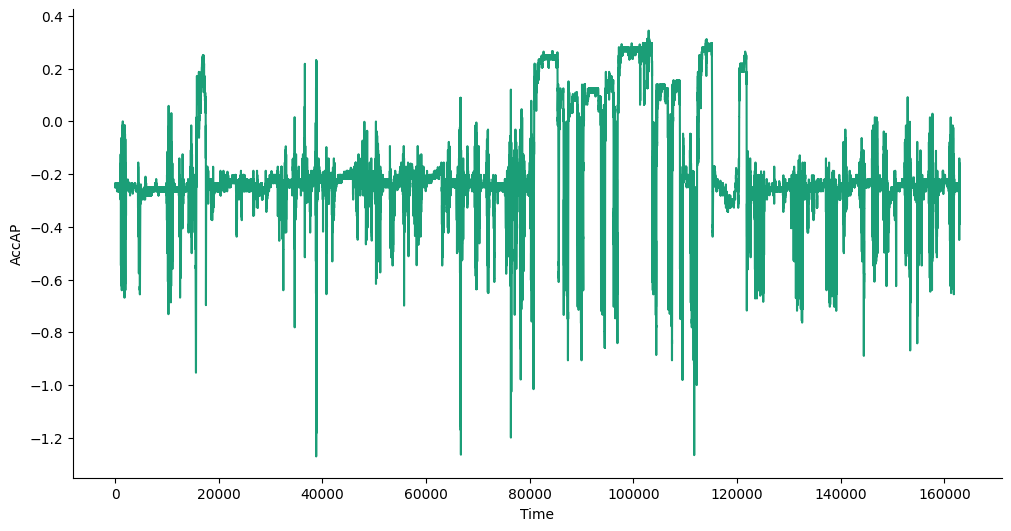

In [ ]:
# @title Time vs AccAP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['AccAP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = defog.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('AccAP')

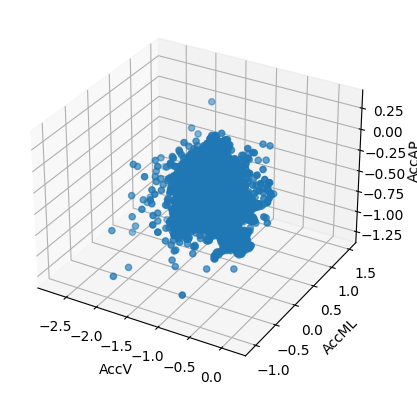

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(defog['AccV'], defog['AccML'], defog['AccAP'])

# Label axes
ax.set_xlabel('AccV')
ax.set_ylabel('AccML')
ax.set_zlabel('AccAP')

# Show the plot
plt.show()

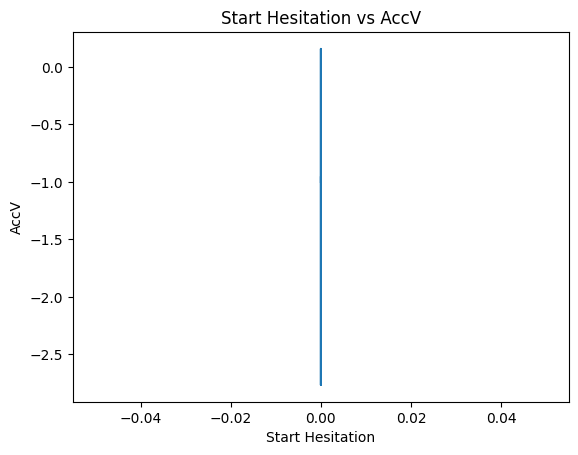

In [ ]:
accV1 = defog['AccV']
start_hes = defog['StartHesitation']

x = start_hes
y = accV1

plt.plot(x, y)
plt.xlabel("Start Hesitation")  # add X-axis label
plt.ylabel("AccV")  # add Y-axis label
plt.title("Start Hesitation vs AccV")  # add title
plt.show()

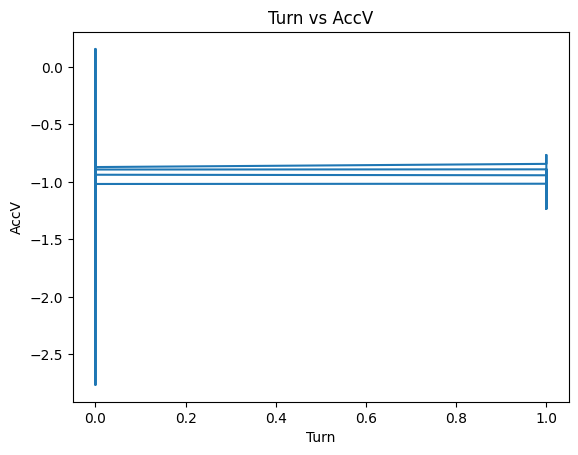

In [ ]:
accV1 = defog['AccV']
turn = defog['Turn']

x = turn
y = accV1

plt.plot(x, y)
plt.xlabel("Turn")  # add X-axis label
plt.ylabel("AccV")  # add Y-axis label
plt.title("Turn vs AccV")  # add title
plt.show()

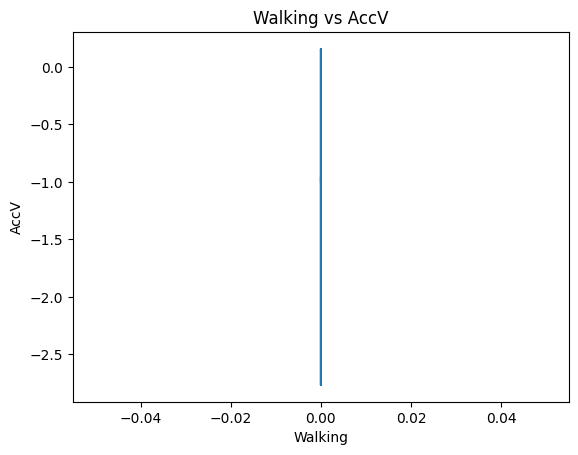

In [ ]:
accV1 = defog['AccV']
walking = defog['Walking']

x = walking
y = accV1

plt.plot(x, y)
plt.xlabel("Walking")  # add X-axis label
plt.ylabel("AccV")  # add Y-axis label
plt.title("Walking vs AccV")  # add title
plt.show()

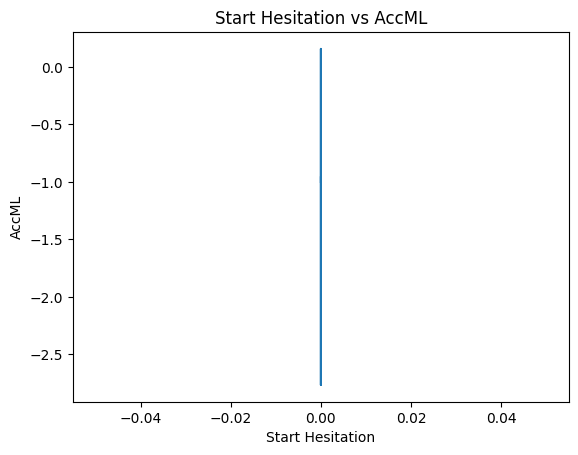

In [ ]:
accML = defog['AccML']
start_hes = defog['StartHesitation']

x = start_hes
y = accV1

plt.plot(x, y)
plt.xlabel("Start Hesitation")  # add X-axis label
plt.ylabel("AccML")  # add Y-axis label
plt.title("Start Hesitation vs AccML")  # add title
plt.show()

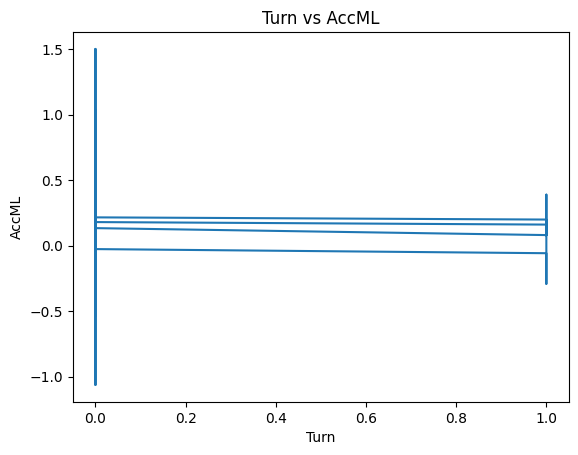

In [ ]:
accML = defog['AccML']
turn = defog['Turn']

x = turn
y = accML

plt.plot(x, y)
plt.xlabel("Turn")  # add X-axis label
plt.ylabel("AccML")  # add Y-axis label
plt.title("Turn vs AccML")  # add title
plt.show()

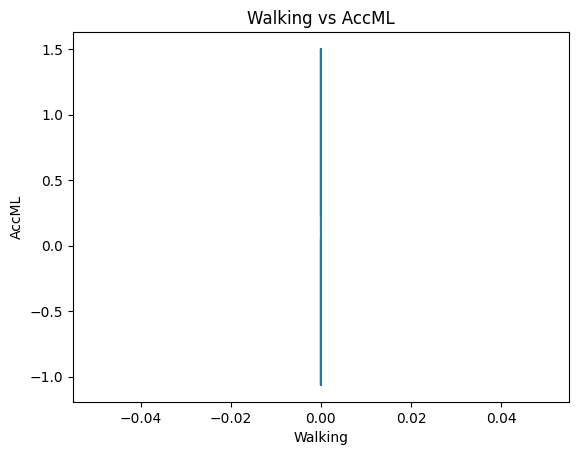

In [ ]:
accML = defog['AccML']
walking = defog['Walking']

x = walking
y = accML

plt.plot(x, y)
plt.xlabel("Walking")  # add X-axis label
plt.ylabel("AccML")  # add Y-axis label
plt.title("Walking vs AccML")  # add title
plt.show()

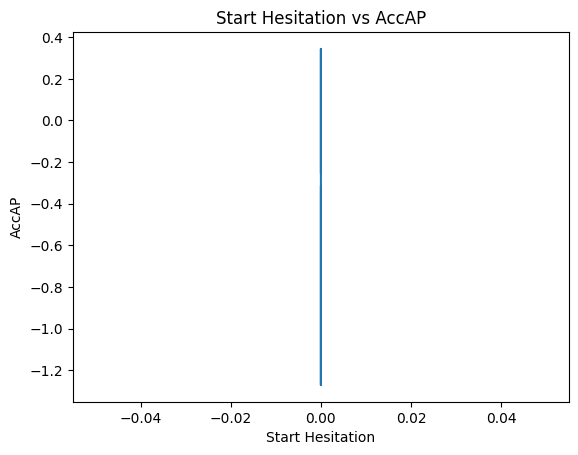

In [ ]:
accAP = defog['AccAP']
start_hes = defog['StartHesitation']

x = start_hes
y = accAP

plt.plot(x, y)
plt.xlabel("Start Hesitation")  # add X-axis label
plt.ylabel("AccAP")  # add Y-axis label
plt.title("Start Hesitation vs AccAP")  # add title
plt.show()

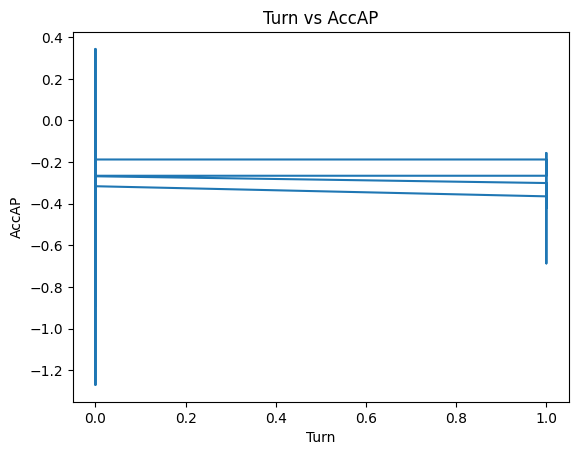

In [ ]:
accAP = defog['AccAP']
turn = defog['Turn']

x = turn
y = accAP

plt.plot(x, y)
plt.xlabel("Turn")  # add X-axis label
plt.ylabel("AccAP")  # add Y-axis label
plt.title("Turn vs AccAP")  # add title
plt.show()

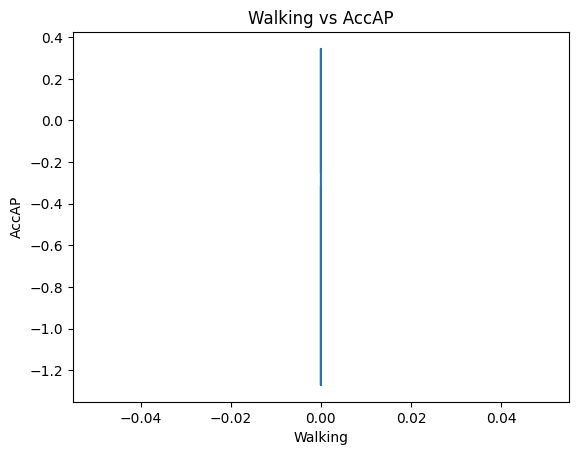

In [ ]:
accAP = defog['AccAP']
walking = defog['Walking']

x = walking
y = accAP

plt.plot(x, y)
plt.xlabel("Walking")  # add X-axis label
plt.ylabel("AccAP")  # add Y-axis label
plt.title("Walking vs AccAP")  # add title
plt.show()

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task', 'source_directory', 'csv_name', 'IsFOG'],
      dtype='object')
Outliers in AccAP column:
           Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
1107      1107 -1.385796  0.103925 -0.394731                0     0        0   
1108      1108 -1.357201  0.073889 -0.406250                0     0        0   
1109      1109 -1.283650  0.038800 -0.395835                0     0        0   
1110      1110 -1.176735  0.031250 -0.390625                0     0        0   
1111      1111 -1.066223  0.073254 -0.384543                0     0        0   
...        ...       ...       ...       ...              ...   ...      ...   
162899  162899 -1.000000  0.234375 -0.390625                0     0        0   
162900  162900 -1.009414  0.234375 -0.390625                0     0        0   
162901  162901 -1.015625  0.234375 -0.381733                0     0        0   
162902

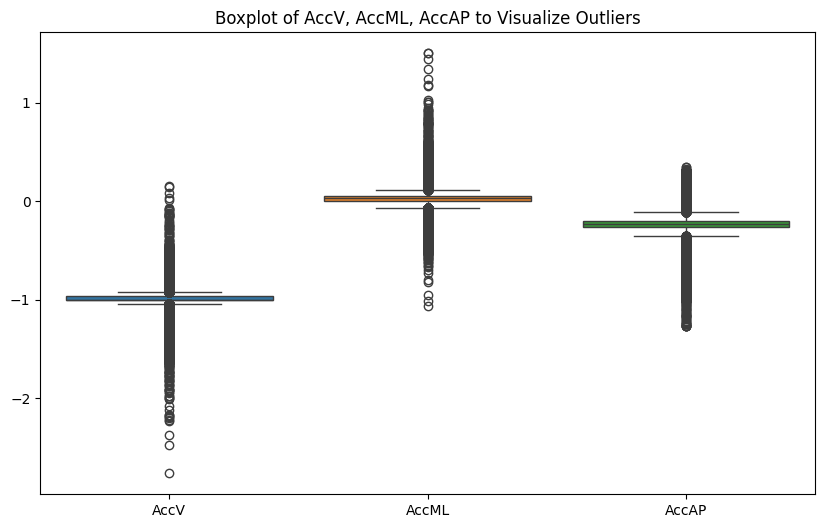

In [ ]:
print(defog.columns)

# Outlier detection function using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_AccAP = detect_outliers_iqr(defog, 'AccAP')
print("Outliers in AccAP column:\n", outliers_AccAP)

plt.figure(figsize=(10, 6))
sns.boxplot(data=defog[['AccV', 'AccML', 'AccAP']])
plt.title("Boxplot of AccV, AccML, AccAP to Visualize Outliers")
plt.show()

In [ ]:
from scipy.stats import zscore
defog['AccAP_zscore'] = zscore(defog['AccAP'])
defog['Walking_zscore'] = zscore(defog['Walking'])
print(defog[['AccAP', 'AccAP_zscore', 'Walking', 'Walking_zscore']].head())

   AccAP  AccAP_zscore  Walking  Walking_zscore
0  -0.25     -0.327586        0             NaN
1  -0.25     -0.327586        0             NaN
2  -0.25     -0.327586        0             NaN
3  -0.25     -0.327586        0             NaN
4  -0.25     -0.327586        0             NaN


In [ ]:
threshold = 0.1
filtered_defog = defog[(defog['AccAP_zscore'].abs() <= threshold) & (defog['Walking_zscore'].abs() <= threshold)]
print(filtered_defog[['AccAP', 'AccAP_zscore', 'Walking', 'Walking_zscore']].head())

Empty DataFrame
Columns: [AccAP, AccAP_zscore, Walking, Walking_zscore]
Index: []


'\nplt.plot(time, turn_hesitation_col, \'r\')\nplt.ylabel(\'Amplitude\')\nplt.xlabel(\'Samples\')\nplt.title(\'Normalized FFT Spectrum\')\n\nplt.show()\n\nplt.plot(time, AccML_data, \'b\')\nplt.plot(time, AccAP_data, \'g\')\nplt.plot(time, AccV_data)\n\nplt.plot(time, turn_hesitation_col, \'r\')\nplt.title("Accel vs Time with Turn hesistation")\n\nplt.show()\n'

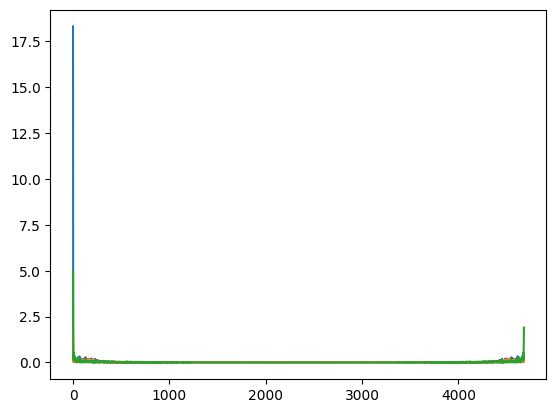

In [ ]:
#tdcsfog; 003f117e14.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
file_name = "003f117e14.csv"
folder_path = "/content/drive/MyDrive/Colab Notebooks/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
file_path = os.path.join(folder_path, file_name)
df_tdcsfog = pd.read_csv(file_path)
#display(df_tdcsfog.describe(include='all'))
turn_hesitation_col = df_tdcsfog['Turn']
#display(turn_hesitation_events)
AccV_data = df_tdcsfog['AccV']
AccML_data = df_tdcsfog['AccML']
AccAP_data = df_tdcsfog['AccAP']
time = df_tdcsfog['Time']


#fourier transform
'''
fs = 256 #128hz*2
T = 1/fs
'''


New_AccV_data = abs(fft(AccV_data.values))
New_AccML_data = abs(fft(AccML_data.values))
New_AccAP_data = abs(fft(AccAP_data.values))
length = len(AccV_data)
normalize = length/2



plt.plot(np.abs(New_AccV_data)/normalize)
plt.plot(np.abs(New_AccML_data)/normalize)
plt.plot(np.abs(New_AccAP_data)/normalize)
'''
plt.plot(time, turn_hesitation_col, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')

plt.show()

plt.plot(time, AccML_data, 'b')
plt.plot(time, AccAP_data, 'g')
plt.plot(time, AccV_data)

plt.plot(time, turn_hesitation_col, 'r')
plt.title("Accel vs Time with Turn hesistation")

plt.show()
'''





In [ ]:
#removing missing values
#defog dataset, valid = false, task = false
#tdcsfog has no missing values

defog = defog[defog['Valid']]
defog = defog[defog['Task']]

print('Valid column has false values:',(defog['Valid'] == False).any())
print('Task column has false values:',(defog['Task'] == False).any())

Valid column has false values: False
Task column has false values: False


In [ ]:
pip install antropy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.7 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16879 sha256=9e0a977eb40adb215f51bf5366af4228441540ae9d0a7a171e09299508598af5
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy


In [ ]:
#Extract TIME-DOMAIN FEATURES from DEFOG
from scipy import stats
from scipy import signal
import antropy as ant

#calculating magnitude
#mag = np.sqrt(np.power(defog['AccV'],2) +  np.power(defog['AccML'],2) + np.power(defog['AccAP'],2)).to_numpy()
#segmentation
#freq = 36873
#mag = mag.reshape((-1,freq))

#signal distribution
q90, q75, q50, q25, q10 = np.percentile(defog[['AccV', 'AccML', 'AccAP']], [90 , 75 ,50 , 25 , 10],axis=1)
interQuartileRange = q75 - q25
print('interquartile range:', interQuartileRange)

#Probability Distribution - Kurtosis, Skewness, Coefficient of variation
kurtosis = stats.kurtosis(defog[['AccV', 'AccML', 'AccAP']],axis=1)
print('kurtosis:', kurtosis)
skew = stats.skew(defog[['AccV', 'AccML', 'AccAP']],axis=1)
print('skew', skew)
#coeff_variance = std / mean
#print('coefficient of variation:\n', coeff_variance)
print()

#signal power - sum of the absolute squares of its time-domain samples divided by the signal length
arr_sqrd = np.power(defog[['AccV', 'AccML', 'AccAP']],2)
signal_power = np.sum(np.abs(arr_sqrd),axis=1) / len(defog[['AccV', 'AccML', 'AccAP']])
log_energy = np.sum(np.log(arr_sqrd))
print('signal power:\n', signal_power)

#peak intensity, zero crossings
peak_intensityV= len(signal.find_peaks(defog['AccV'])[0]) #find_peaks takes a 1d array
peak_intensityML= len(signal.find_peaks(defog['AccML'])[0])
peak_intensityAP= len(signal.find_peaks(defog['AccAP'])[0])
print('peak intensity AccV, :', peak_intensityV)
print('peak intensity AccML, :', peak_intensityML)
print('peak intensity AccAP, :', peak_intensityAP)
zero_cross = ant.num_zerocross(defog[['AccV', 'AccML', 'AccAP']],axis=1)
print('zero crossings:', zero_cross)

interquartile range: [0.51582224 0.5144358  0.50669563 ... 0.5312075  0.53125    0.53125   ]
kurtosis: [-1.5 -1.5 -1.5 ... -1.5 -1.5 -1.5]
skew [-0.41317193 -0.44253921 -0.46158009 ... -0.48110434 -0.48107459
 -0.45608509]

signal power:
 1000      0.000028
1001      0.000028
1002      0.000028
1003      0.000028
1004      0.000028
            ...   
161902    0.000028
161903    0.000028
161904    0.000029
161905    0.000029
161906    0.000029
Length: 36873, dtype: float64
peak intensity AccV, : 3064
peak intensity AccML, : 3674
peak intensity AccAP, : 3205
zero crossings: [2 2 2 ... 2 2 2]


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
pip install tsflex seglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00


In [ ]:
#extract FREQUENCY-DOMAIN FEATURES
from tsflex.features import FeatureCollection, MultipleFeatureDescriptors
from tsflex.features.integrations import seglearn_feature_dict_wrapper
from seglearn.feature_functions import base_features, emg_features

basic_feats = MultipleFeatureDescriptors(
    functions=seglearn_feature_dict_wrapper(base_features()),
    series_names=['AccV', 'AccML', 'AccAP'],
    windows=[5000],
    strides=[5000],
)

emg_feats = emg_features()
del emg_feats['simple square integral'] # is same as abs_energy (which is in base_features)

emg_feats = MultipleFeatureDescriptors(
    functions=seglearn_feature_dict_wrapper(emg_feats),
    series_names=['AccV', 'AccML', 'AccAP'],
    windows=[5000],
    strides=[5000],
)

fc = FeatureCollection([basic_feats, emg_feats])
print(fc)

AccAP: (
	win: 5000  : [
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__mean, ['mean'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__median, ['median'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__abs_energy, ['abs_energy'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__std, ['std'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__var, ['var'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__minimum, ['minimum'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__maximum, ['maximum'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__skew, ['skew'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([seglearn_wrapped]__kurt, ['kurt'], {})    stride: ['5000'],
		FeatureDescriptor - func: FuncWrapper([s